In [10]:
import pandas as pd
import numpy as np
import math
%matplotlib inline

## Problem #2: Chace contact

In [11]:
def windowMeet(lil_wait,bill_wait,time_window):
    '''Random time of arrival of two people in a given window; each person will
    wait a certain amount of time if they arrive first. Assumes they do come in and not
    before or after window ends. Begin window = 0. All parameters must be same unit of time to work'''
    lil_arrive_time = np.random.random()*time_window
    bill_arrive_time = np.random.random()*time_window
    
    #determine first arrival, calcs when person leaves, 2nd arrival < window_edge == success
    if lil_arrive_time < bill_arrive_time:
        window_edge = lil_arrive_time + lil_wait
        return bill_arrive_time<window_edge
    else:
        window_edge = bill_arrive_time + bill_wait
        return lil_arrive_time<window_edge

#changes the time window from 1 minute to 150 minute window each window x amount inner loop
measurement_array = np.array([[windowMeet(7,7,time) for i in range(10000)] for time in range(150)])
mean_array = np.mean(measurement_array,axis=1)

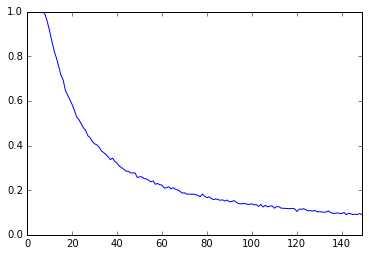

In [12]:
pd.Series(mean_array).plot()

## Problem #3 Mutual Nearest Neighbors

In [2]:
def carsMutualNN(car_count):
    '''If a car has a nearest neighbor what is the chance the nearest neighbor is mutual'''
    #creates a random sequence of cars between 0 and 1 and sorts
    rand_car_array = np.random.random(car_count)
    rand_car_array.sort()
    #backcar_dist and frontcar_dist measure distance of the cars adjacent; 
    backcar_dist = abs(np.append(rand_car_array[1], rand_car_array[:-1])-rand_car_array)
    frontcar_dist = abs(np.append(rand_car_array[1:], rand_car_array[-2])-rand_car_array)
    #nn incrementss or decrements depending on which car is closer
    #cars at edges only have one neighbor so auto inc or dec
    nn = np.arange(0,car_count)
    nn += frontcar_dist<backcar_dist
    nn -= frontcar_dist>backcar_dist
    nn[0]+=1
    nn[car_count-1]-=1
    #selects a random car array and selects by index; then selects car's nn
    rand = np.random.randint(0,car_count)
    rand_car_nn = nn[rand]
    #looks up the random car's nearest neighbor nearest neighbor
    rand_car_nn_nn = nn[rand_car_nn]
    #if equivalent they are mutual return True
    return rand_car_nn_nn == rand

In [3]:
cars_in_line = 35
trial_count = 10000
dic_counter={i:0 for i in range(3,cars_in_line)}
for x in range(3,cars_in_line):
    for y in range(trial_count):
        dic_counter[x] += carsMutualNN(x)
dic_counter

{3: 6674,
 4: 6628,
 5: 6622,
 6: 6634,
 7: 6685,
 8: 6693,
 9: 6710,
 10: 6612,
 11: 6589,
 12: 6639,
 13: 6771,
 14: 6695,
 15: 6712,
 16: 6668,
 17: 6743,
 18: 6617,
 19: 6665,
 20: 6645,
 21: 6633,
 22: 6556,
 23: 6700,
 24: 6709,
 25: 6668,
 26: 6682,
 27: 6726,
 28: 6665,
 29: 6640,
 30: 6676,
 31: 6723,
 32: 6526,
 33: 6679,
 34: 6632}

## problem #4: Funny Coin Game

In [14]:
def ccfg(l,m,n,p):
    '''Number of games it takes until one of three players is bankrupt. l,m,n is
    amount of coins each player has. p is probability of flipping heads (or Tails)'''
    game_counter = 0
    player_dic = {0:l,1:m,2:n}
    while player_dic[0]>0 and player_dic[1]>0 and player_dic[2]>0:
        #each player flips a coin. If flip is below p it is Heads == 1
        flips = np.random.random(size=3)<p
        #No player wins if coins are HHH|TTT; count incs w/ no change in wealth
        if sum(flips)==3 or sum(flips)==0:
            game_counter+=1
            continue
        #if flips adds to 2, player who flipped Tails == 0 wins; identify player
        elif sum(flips)==2:
            winner = np.where(flips==0)[0][0]
        #if flips adds to 1, player who flipped Heads == 1 wins; indentify player
        else:
            winner = np.where(flips==1)[0][0]
        #winner gets 1 coin from each losing player; game counter increments
        player_dic[winner] += 2
        loser_list = [i for i in range(3) if i != winner]
        player_dic[loser_list[0]] -= 1
        player_dic[loser_list[1]] -= 1
        game_counter += 1
    return game_counter

list_of_samples = np.array([[ccfg(1,2,3,.5) for y in range(100)] for x in range(100)])
sample = np.mean(list_of_samples, axis=0)

1.9994000000000001

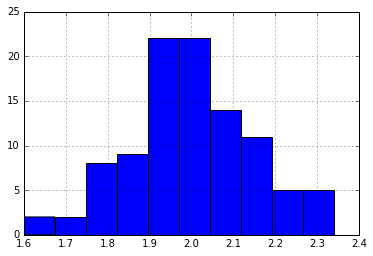

In [19]:
pd.Series(sample).hist();
sample.mean()